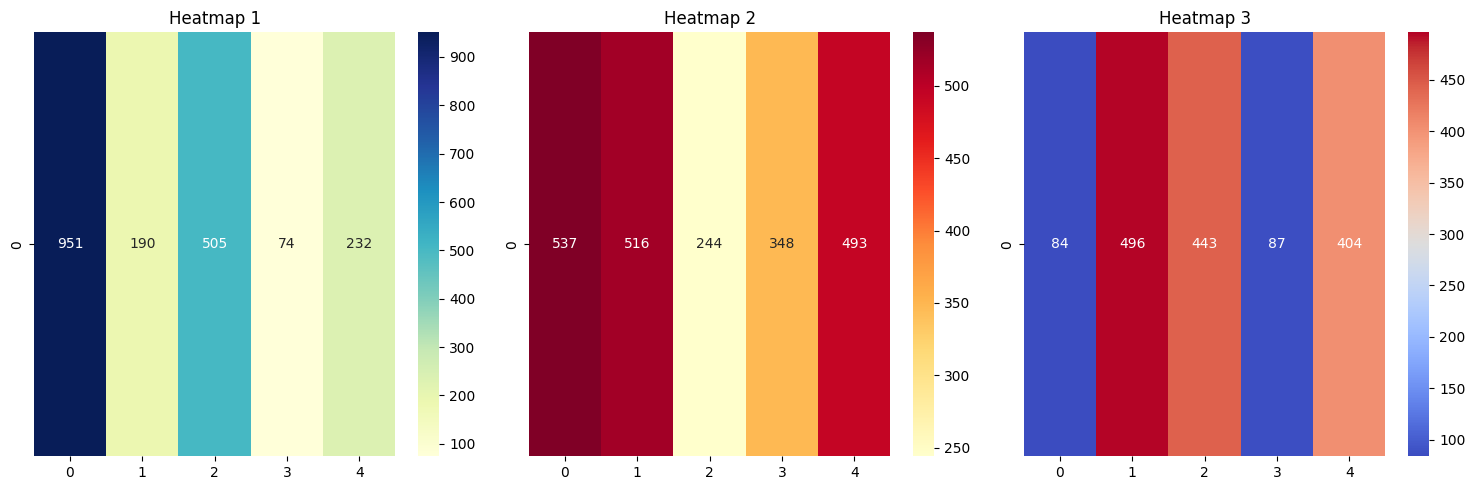

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# 初始化 wandb

# 构造三个示例矩阵
matrix1 = np.random.randint(0, 1000, (1, 5))
matrix2 = np.random.randint(0, 1000, (1, 5))
matrix3 = np.random.randint(0, 1000, (1, 5))

# 创建画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 一行三列

# 第一个热力图
sns.heatmap(matrix1, ax=axes[0], annot=True, fmt="d", cmap="YlGnBu")
axes[0].set_title("Heatmap 1")

# 第二个热力图
sns.heatmap(matrix2, ax=axes[1], annot=True, fmt="d", cmap="YlOrRd")
axes[1].set_title("Heatmap 2")

# 第三个热力图
sns.heatmap(matrix3, ax=axes[2], annot=True, fmt="d", cmap="coolwarm")
axes[2].set_title("Heatmap 3")

plt.tight_layout()

plt.show()


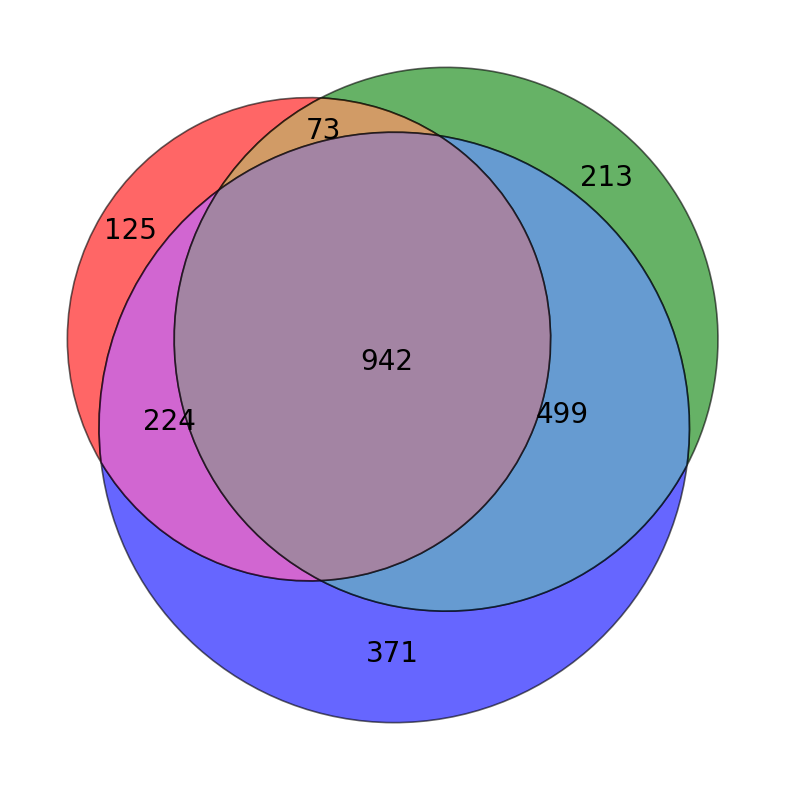

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import json
import matplotlib

# 读取布尔向量
with open('x1.txt', 'r') as f:
    A = json.load(f)
with open('x2.txt', 'r') as f:
    B = json.load(f)
with open('x3.txt', 'r') as f:
    C = json.load(f)

# 转换为集合索引
set_A = set(np.where(A)[0])
set_B = set(np.where(B)[0])
set_C = set(np.where(C)[0])

# 绘图
plt.figure(figsize=(8, 8))
v = venn3([set_A, set_B, set_C], set_labels=('', '', ''))

label_dict = {
    'A': 'Text-only',
    'B': 'Vision-only',
    'C': 'T&V'
}

# 设置字体大小
# for label_id in ['A', 'B', 'C']:
#     label_text = label_dict[label_id]
#     pos = v.get_label_by_id(label_id).get_position() + np.array([-0.05, 0.03])
    
#     plt.annotate(
#         label_text,
#         xy=pos,
#         ha='center', va='center',
#         fontsize=15,
#         color='black',
#         bbox=dict(boxstyle='round,pad=0.3', fc='#098154', alpha=0.2),
#         arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='black')
#     )
for idx, area in enumerate(['100', '001', '010']):
    if v.get_patch_by_id(area):
        v.get_patch_by_id(area).set_alpha(0.6)   # 设置透明度
        v.get_patch_by_id(area).set_edgecolor('black')  # 描边
        v.get_patch_by_id(area).set_linewidth(1.2)       # 边框粗细
# 设置区域数值的字体大小
for subset in v.subset_labels:
    if subset:
        subset.set_fontsize(20)

# 添加标题
# plt.title("集合交并关系图（Text / Vision / Both）", fontsize=16)

# 去除边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 显示
plt.tight_layout()
plt.savefig('venn_diagram.png', dpi=1000, bbox_inches='tight')
plt.show()


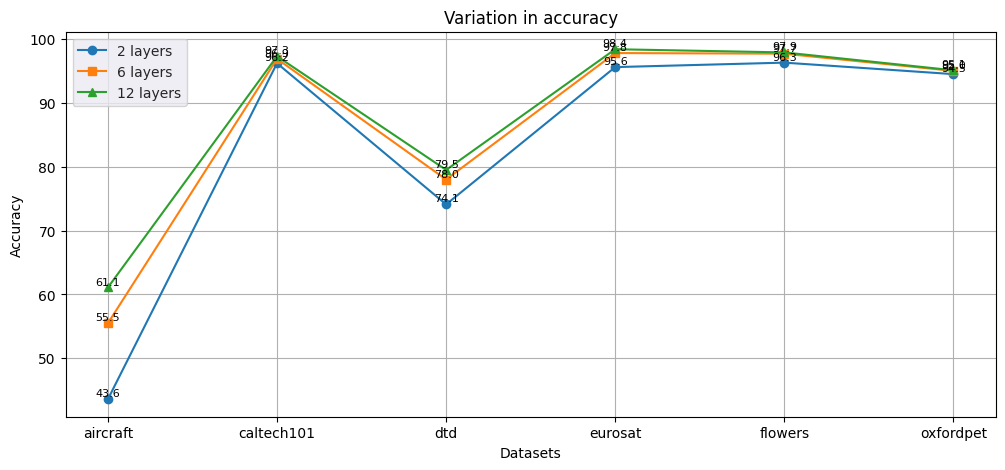

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

layer_2 = [43.6, 96.2, 74.1, 95.6, 96.3, 94.5]
layer_6 = [55.5, 96.9, 78.0, 97.8, 97.7, 95.0]
layer_12 = [61.1, 97.3, 79.5, 98.4, 97.9, 95.1]
datasets = ["aircraft", "caltech101", "dtd", "eurosat", "flowers", "oxfordpet"]
resume_dir = "./output/2025_5_9"
fig = plt.figure(figsize=(12, 5))
plt.plot(datasets, layer_2, label="2 layers", marker='o')
for x, y in zip(datasets, layer_2):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)
plt.plot(datasets, layer_6, label="6 layers", marker='s')
for x, y in zip(datasets, layer_6):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)
plt.plot(datasets, layer_12, label="12 layers", marker='^')
for x, y in zip(datasets, layer_12):
    if y is not None:
        plt.text(x, y + 0.4, f"{y}", ha='center', fontsize=8)

plt.grid()
sns.set_style("darkgrid")
plt.title("Variation in accuracy")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(os.path.join(resume_dir, "acc_layer.png"), dpi=1000)
plt.show()